Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

*Describe your dataset and what you want to analyze*
 


*******************
*******************
# **Libraries**

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [48]:
# Functions that you develop
def dummy(df, col_name):
    """
    The function that transform the categorical data in mushrooms into dummy variables
    :df: the dataframe that you want to dummy code in
    :col_name: the column that you want to dummy code in
    """
    dummies = pd.get_dummies(df[col_name], drop_first = True)
    dummies.columns = col_name + "_" + dummies.columns
    return df.join(dummies).drop([col_name], axis = 1)

def main(X, y):
    """
    The function that perform the train test split, linear regression and evaluation on the input values X, and y
    :X: the feature variables
    :y: the labels to train
    """
    # firstly train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    # fit a linear regression model
    model = LinearRegression(fit_intercept = True).fit(X_train, y_train)
    # predict the y data for X test from the model
    predicted = X_test.dot(model.coef_) + model.intercept_
    # create two subplots if there is only single input
    fig,axes = plt.subplots(X_train.shape[1],2,figsize=[14,8 * X_train.shape[1]])
    if X.shape[1] == 1:
        sns.scatterplot(x = X_train[X_train.columns[0]], y = y_train, ax = axes[0])
        sns.lineplot(x = X_train[X_train.columns[0]],y = X_train.dot(model.coef_) + model.intercept_,ax=axes[0])        
        sns.scatterplot(x = X_test[X_test.columns[0]], y = y_test, ax = axes[1])
        sns.lineplot(x = X_test[X_test.columns[0]],y = predicted,ax=axes[1])
        axes[0].text(0, 15, "R^2 value: " + str(model.score(X_train, X_train.dot(model.coef_) + model.intercept_)))
        axes[1].text(0, 25, "R^2 value: " + str(model.score(X_test, y_test)))
        return model.score(X_test, y_test)
    
    # iterate through the features if we have multiple columns
    for i in range(X_train.shape[1]):
        sns.scatterplot(x = X_train[X_train.columns[i]], y = y_train, ax = axes[i,0])
        sns.lineplot(x = X_train[X_train.columns[i]], y = X_train.dot(model.coef_) + model.intercept_, ax = axes[i,0])
        sns.scatterplot(x = X_test[X_test.columns[i]], y = y_test, ax = axes[i,1])
        sns.lineplot(x = X_test[X_test.columns[i]], y = predicted, ax = axes[i,1])
    return model.score(X_test, y_test)

*******************
*******************
# **Getting data**

*Provide Pseudocode*

In [2]:
# Code for acquiring data
mushrooms = pd.read_csv("mushrooms.csv")

In [4]:
# Display first 5 rows of data
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Display last 5 rows of data
mushrooms.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
# Show data.info
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# Show data.describe
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


***************
***************
# **Visualizing data**

*Since all the data is categorical, I decide to use pie chart as the majority of the visualization *

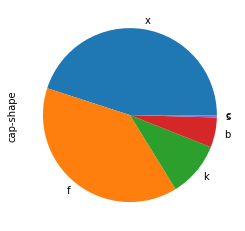

In [11]:
# visualization 1
mushrooms["cap-shape"].value_counts().plot.pie()

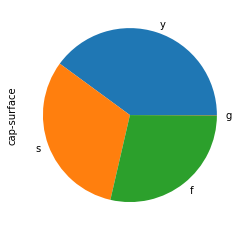

In [12]:
# visualization 2
mushrooms["cap-surface"].value_counts().plot.pie()

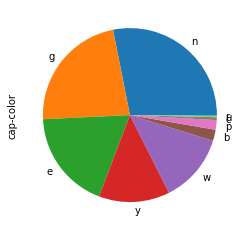

In [22]:
# visualization 3
mushrooms["cap-color"].value_counts().plot.pie()

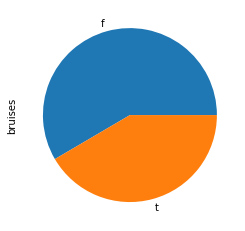

In [14]:
# visualization 4
mushrooms["bruises"].value_counts().plot.pie()

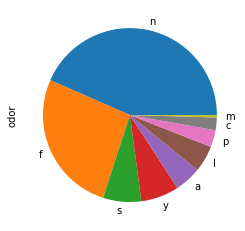

In [15]:
# visualization 5
mushrooms["odor"].value_counts().plot.pie()

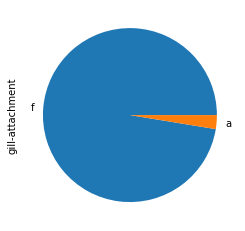

In [16]:
# visualization 6
mushrooms["gill-attachment"].value_counts().plot.pie()

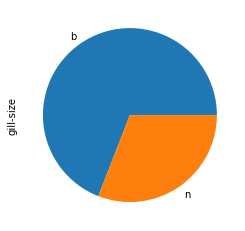

In [18]:
# visualization 7
mushrooms["gill-spacing"].value_counts().plot.pie()

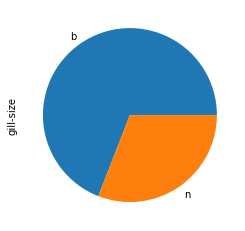

In [19]:
# visualization 8
mushrooms["gill-size"].value_counts().plot.pie()

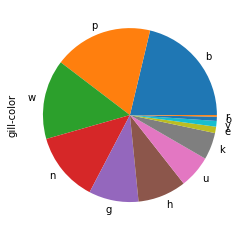

In [23]:
# visualization 9
mushrooms["gill-color"].value_counts().plot.pie()

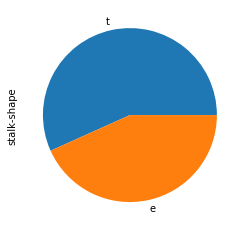

In [24]:
# visualization 10
mushrooms["stalk-shape"].value_counts().plot.pie()

***************
***************
# **Feature Engineering**

*If making specific choices (e.g., binning data, dummy coding, etc), please describe what you plan to do here*

*Provide relevant pseudocode*


In [25]:
# Check and take care of null values
# check all the null values
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Since there is no null values, I don't have to worry about it.

In [46]:
# Check and take care of string values
# Since all the variables are strings, I decide to dummy encode them
# Function dummy() is define at cell 6
result = mushrooms.copy()
for col in mushrooms.columns:
    result = dummy(result, col)
result

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


As we can see here, all the categorical columns are transformed into corresponding dummy columns with format "col_name_" + "dummy_value"

In [47]:
# Check and take care of outliers
print("Since all the values are categorical, I should not worry about outlier")

Since all the values are categorical, I should not worry about outlier


***************
***************
# **Analysis section**

*Provide relevant pseudocode for linear regression or classification*

In [ ]:
# Machine Learning 1


In [ ]:
# Machine Learning 2, if needed

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*